Text(0.5, 1.0, 'Subfigure 2')

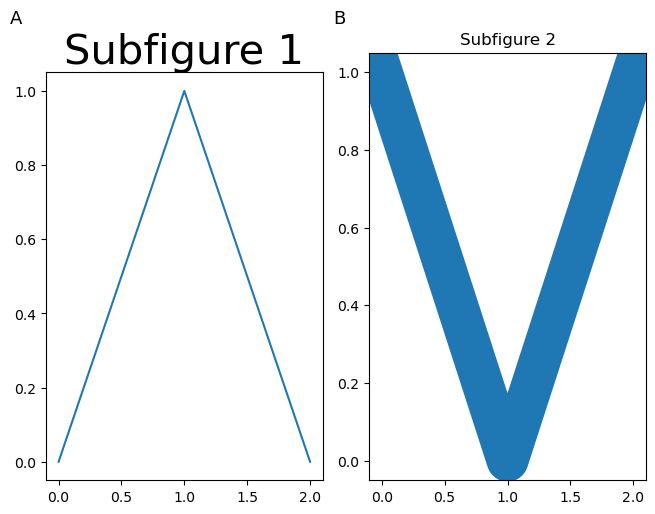

In [1]:
import matplotlib.pyplot as plt
import numpy as np

scaling_factor = 0.1

# Function for setting the default figure size
def figsize(rel_width, rel_height):
    default_width = 15 * scaling_factor  # inches

    return (rel_width * default_width, rel_height * default_width)


# Function for labelling figures with letters
def label_figure(fig, pos, label):
    if isinstance(pos, str):
        if pos == "top left":
            pos = (0, 1.01)
        elif pos == "top right":
            pos = (0.98, 1.01)
    
    if isinstance(pos, tuple):
        fig.text(*pos, label, size=13)


# Get a factor of the original rcParam as value
def rcfac(rckwarg: str, factor: float):
    old = plt.rcParams.get(rckwarg)
    if isinstance(old, int):
        return int(np.round(old * factor))
    elif isinstance(old, float):
        return old * factor
    elif old is None:
        raise ValueError(f"not an rcParam: {rckwarg}")
    else:
        raise ValueError(f"unsupported type of rcParam: {type(old)}")

# Set the default parameters for plots

# Generally halve the size and width of fonts, lines, etc.
# plt.rcParams.update(
#     {k:v*scaling_factor for k,v in plt.rcParams.items() if (k.endswith("size") or k.endswith("width") or k.endswith("pad")) and isinstance(v, (int, float))}
# ) 


# Create the Figure layouts
paper_figs = {}

plt.rcParams["figure.max_open_warning"] = 30

# MAIN FIGURES
# Create figure 1
# paper_figs["Fig1"] = {"main": plt.figure(figsize=figsize(1, 0.4))}

# Create figure 2
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,2)

sfig1 = fig.add_subfigure(gs[0])
label_figure(sfig1, pos="top left", label="A")
sfig2 = fig.add_subfigure(gs[1])
label_figure(sfig2, pos="top left", label="B")

paper_figs["Fig7"] = {
    "main": fig,
    "subs": {
        "A": sfig1,
        "B": sfig2,
    }
}

fig = paper_figs["Fig7"]["subs"]["A"]
ax1 = fig.subplots()
ax1.plot([0, 1, 2], [0, 1, 0])
ax1.set_title("Subfigure 1", size=30)

ax2 = paper_figs["Fig7"]["subs"]["B"].subplots()
ax2.plot([0, 1, 2], [1, 0, 1], linewidth=30)
ax2.set_title("Subfigure 2")

# paper_figs["Fig7"]["main"]

In [2]:
import matplotlib
print(matplotlib.__version__)

3.7.1


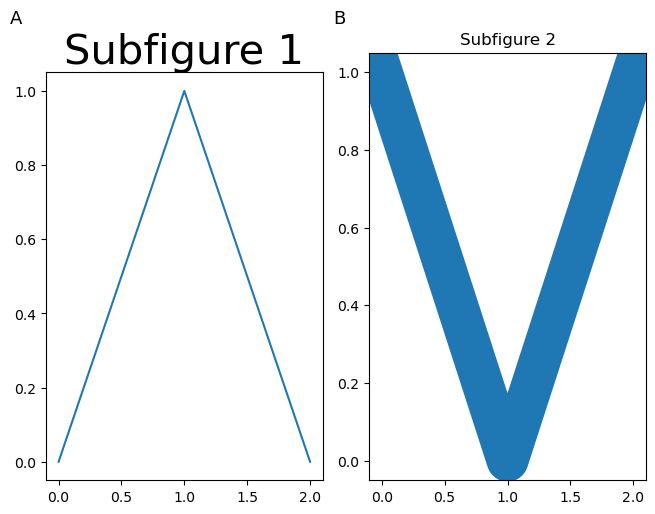

In [3]:
plt.figure(sfig1)

In [4]:
sfig1

In [5]:
fig

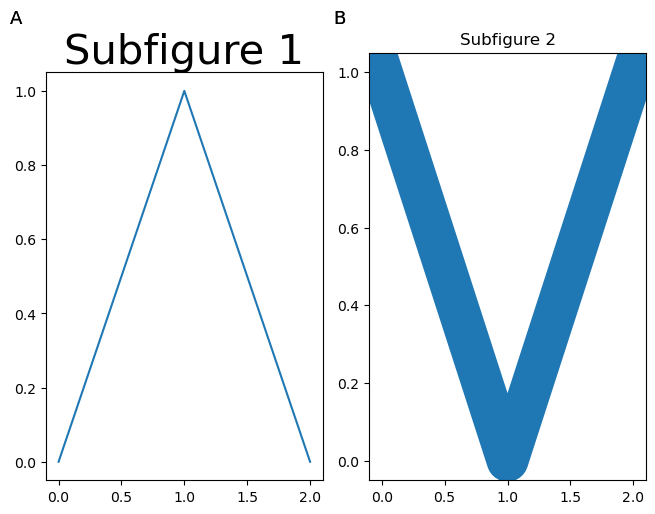

<Figure size 640x480 with 0 Axes>

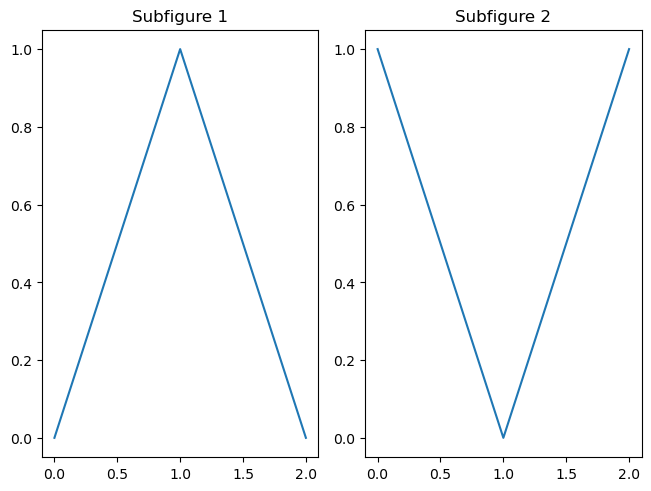

In [6]:
import matplotlib.pyplot as plt

# Create a figure with multiple subfigures
fig = plt.figure()

# Add subfigures
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,2)
subfig1 = fig.add_subfigure(gs[0])
label_figure(sfig1, pos="top left", label="A")
subfig2 = fig.add_subfigure(gs[1])
label_figure(sfig2, pos="top left", label="B")

# Add content to subfigure 1
ax1 = subfig1.add_subplot()
ax1.plot([0, 1, 2], [0, 1, 0])
ax1.set_title("Subfigure 1")

# Add content to subfigure 2
ax2 = subfig2.add_subplot()
ax2.plot([0, 1, 2], [1, 0, 1])
ax2.set_title("Subfigure 2")

# Display only subfigure 1 separately
# You can do this by simply calling the `subfig1` object and showing it
plt.figure(subfig1)
plt.show()

# You can also display the whole figure with both subfigures
plt.show()  # This would show both subfigures normally


Text(0.5, 1.0, 'Subfigure 2')

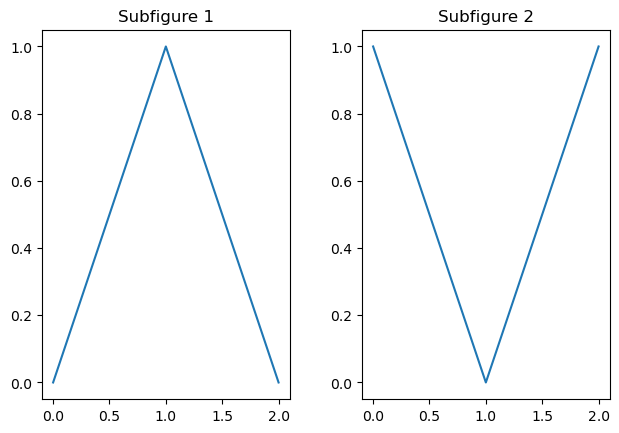

In [7]:
import matplotlib.pyplot as plt

# Create a figure with multiple subfigures
fig = plt.figure()

# Add subfigures
# fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,2)
subfig1 = fig.add_subfigure(gs[0])
subfig2 = fig.add_subfigure(gs[1])

# Add content to subfigure 1
ax1 = subfig1.add_subplot()
ax1.plot([0, 1, 2], [0, 1, 0])
ax1.set_title("Subfigure 1")

# Add content to subfigure 2
ax2 = subfig2.add_subplot()
ax2.plot([0, 1, 2], [1, 0, 1])
ax2.set_title("Subfigure 2")

# # To display subfigure 1 individually:
# fig2 = plt.figure()
# ax = fig2.add_subplot()
# for line in ax1.lines:  # Copy lines from subfigure 1 to new figure
#     ax.plot(line.get_xdata(), line.get_ydata())

# ax.set_title("Subfigure 1")

# plt.show()

In [8]:
class MethodWrapper:
    def __init__(self, obj, additional_task):
        self._obj = obj
        self._additional_task = additional_task

    def __getattr__(self, name):
        # Get the attribute from the wrapped object
        attr = getattr(self._obj, name)
        
        # If the attribute is a method, wrap it
        if callable(attr):
            def wrapped_method(*args, **kwargs):
                # Perform the additional task
                self._additional_task()
                
                # Call the original method
                return attr(*args, **kwargs)
            return wrapped_method
        else:
            # If it's not a method, return it directly (like attributes)
            return attr

# Define a sample class whose methods you want to wrap
class ExampleClass:
    def method1(self, x):
        print(f"Method1 called with argument {x}")
    
    def method2(self, y):
        print(f"Method2 called with argument {y}")
    
    def method3(self):
        print("Method3 called")

# Define the additional task
def additional_task():
    print("Performing additional task...")

# Instantiate the example class
example_obj = ExampleClass()

# Wrap the object and pass the additional task
wrapped_obj = MethodWrapper(example_obj, additional_task)

# Call the methods
wrapped_obj.method1(10)
wrapped_obj.method2(20)
wrapped_obj.method3()


Performing additional task...
Method1 called with argument 10
Performing additional task...
Method2 called with argument 20
Performing additional task...
Method3 called


In [23]:
def split_twin_args(args, kwargs):
    split_args = [args.copy(), args.copy()]
    split_kwargs = [kwargs.copy(), kwargs.copy()]

    for i, arg in enumerate(args):
        if isinstance(arg, TwinStandaloneObj):
            split_args[0][i] = arg.subobj
            split_args[1][i] = arg.alnobj
        else:
            pass

    for k, kwarg in kwargs.items():
        if isinstance(kwarg, TwinStandaloneObj):
            split_kwargs[0][k] = kwarg.subobj
            split_kwargs[1][k] = kwarg.alnobj
        else:
            pass

    return split_args, split_kwargs

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

class TwinStandaloneObj:
    def __init__(self, subax, alnax):
        self.subax = subax
        self.alnax = alnax
    
    def __getattr__(self, name):
        # Get the attribute from the wrapped object
        subattr = getattr(self.subax, name)
        
        # If the attribute is a method, wrap it
        if callable(subattr):
            def wrapped_method(*args, **kwargs):
                [subargs, alnargs], [subkwargs, alnkwargs] = split_twin_args(args, kwargs)

                # Perform the additional task
                alnattr = getattr(self.alnax, name)
                
                # Call the method for the standalone figure
                alnattr(*args, **kwargs)
                # Return the method for the subfigure
                return subattr(*args, **kwargs)
            return wrapped_method
        else:
            # If it's not a method, return it directly (like attributes)
            return subattr

class TwinStandaloneFigure:
    def __init__(self, subfig, standalone_figure_kwargs):
        self.subfig = subfig
        self.alnfig = plt.figure(**standalone_figure_kwargs)

    def __getattr__(self, name):
        # Get the attribute from the wrapped object
        subattr = getattr(self.subfig, name)
        
        # If the attribute is a method, wrap it
        if callable(subattr):
            def wrapped_method(*args, **kwargs):
                # Perform the additional task
                alnattr = getattr(self.alnfig, name)
                
                # Call the method for the standalone figure
                subax = subattr(*args, **kwargs)
                alnax = alnattr(*args, **kwargs)

                if isinstance(subax, (list, np.ndarray, plt.Figure, plt.Axes, plt.GridSpec)):
                    # Combine them into a common axis object
                    if not isinstance(subax, (list, np.ndarray)):
                        return TwinStandaloneObj(subax, alnax)
                    elif len(subax.shape) == 1:
                        return np.array([TwinStandaloneObj(x,y) for x,y in  zip(subax, alnax)])
                    else:
                        return np.array([[TwinStandaloneObj(x,y) for x,y in  zip(_subax, _alnax)] for _subax,_alnax in zip(subax, alnax)])
                else:
                    return subax
            return wrapped_method
        else:
            # If it's not a method, return it directly (like attributes)
            return subattr

In [17]:
fig = plt.figure(constrained_layout=True)

# Add subfigures
# fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,2)
subfig1 = fig.add_subfigure(gs[0])
subfig1 = TwinStandaloneFigure(subfig1, {})
subfig2 = fig.add_subfigure(gs[1])
subfig2 = TwinStandaloneFigure(subfig2, {})



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [18]:
# Add content to subfigure 1
ax1 = subfig1.subplots(2,2)
ax1[0,0].plot([0, 1, 2], [0, 1, 0])
ax1[1,1].plot([0, 2, 4], [0, 1, 0])
ax1[0,0].set_title("Subfigure 1")

# Add content to subfigure 2
ax2 = subfig2.add_subplot()
ax2.plot([0, 1, 2], [1, 0, 1])
ax2.set_title("Subfigure 2")

Text(0.5, 1.0, 'Subfigure 2')

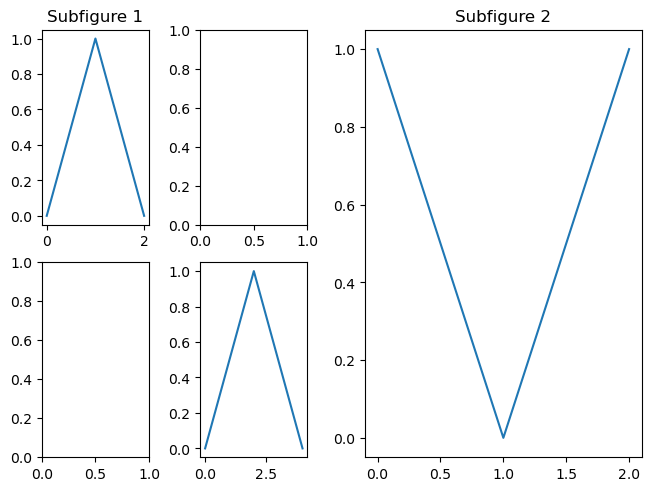

In [19]:
fig

In [127]:
fig = plt.figure()
isinstance(fig.add_gridspec(1,3, width_ratios=[1,1,0.03]), mpl.gridspec.GridSpec)

True

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.Gr

In [126]:
mpl.gridspec.GridSpec

matplotlib.gridspec.GridSpec